# Add feature sets that are collations of other feature sets into families.

The purpose of this notebook is to append feature sets that are defined by collating other feature sets.

This notebook is expected to be called by its parent `UNSEEN_create_feature_sets.ipynb`. It will not run without the requisite loaded during the parent notebook.

## Refresh store.

In [3]:
#%run 'UNSEEN_helper_functions.ipynb'
%store -r

## Combine features into families of feature sets.

'Families' represent higher-level sets of features. We define 7 families (further details in associated publication):
1. Antecedent (A)
2. Concurrent (C)
3. Service Use (S)
4. Treatment (T)
5. Chaotic life (K)
6. Prescription patterns (P)
7. Relevant prescriptions (R)

Each family will have various instantiations:
1. Binary - feature set is 1 for a patient if the patient has at least one of the component features, 0 otherwise. If the component feature is a count, then our new feature set is 1 if the count is at least and 0 otherwise. If the component feature is an ordinal variable, then our new feature set is 0 for the lowest category and 1 otherwise.
    - Component feature sets that are counts need continuous...??
2. Ordinal - based on count of component features that the patient has. Values are {'Few', 'Some', 'Many'} and are family specific.


My first step is to create a new feature set 'Any' feature set for each of the families. These new feature sets indicate that the patient has at least one feature set from a given family but not any feature sets from the other families. This requires that I make and "at least" vector that indicates a patient at least has at least one of a given family's feature sets. I then review all of these vectors together to inform the variable that indicates the patient only has feature sets from a given family.

##  Create the 'Antecedent' family feature sets.

### Create the 'Any' 'Antecedent' family feature set.

In [4]:
# Define list of feature sets that are members of the 'Antecedent' family.
# ## The list of boolean members.
ls_antecedent_fs_bool = \
[
    'abandonment_CYP', 'abandonment_EA', 'ADHD', 'ADHD_Adult', 'ADHD_CYP', 'ADHD_EA',
    'agorophobia_CYP', 'agorophobia_EA', 'alcoholMisuse_CYP', 'alcoholMisuse_EA', 
    'anxietyOrPanic_CYP', 'anxietyOrPanic_EA', 'asylumSeeker', 'asylumSeeker_Adult', 
    'asylumSeeker_CYP', 'asylumSeeker_EA', 'attemptedSuicide_CYP', 'attemptedSuicide_EA', 
    'auditoryHallucinations_CYP', 'auditoryHallucinations_EA', 'autism', 'autism_Adult',
    'autism_CYP', 'autism_EA',
    
    'bodyDysmorphicDisorder_CYP', 'bodyDysmorphicDisorder_EA', 'brainInjury', 'brainInjury_Adult',
    'brainInjury_CYP', 'brainInjury_EA',
    
    'CAMHSrefsAndDisch', 'CAMHSrefsAndDisch_CYP', 'CAMHSrefsAndDisch_EA', 'childAbuse', 'childProtection',
    'crisisContraceptionCYP', 'CYPmentalDisorder', 'CYPneurodevDisorder',
    
    'depressionNotDysthymiaOrChronic_CYP', 'depressionNotDysthymiaOrChronic_EA', 'dissociation_CYP',
    'dissociation_EA', 'drugMisuse_CYP', 'drugMisuse_EA',
    
    'eatingDisorders_CYP', 'eatingDisorders_EA',
    
    'familialMentalHealthConditions', 'familialSubstanceMisuse', 'FamilyConcerns', 'familyHistoryOfAlcoholism',
    'familyHistoryOfPsychosis',
    
    'hoarder_CYP', 'hoarder_EA', 'homeless_CYP', 'homeless_EA',
    
    'incarcerationImprisonment_CYP', 'incarcerationImprisonment_EA',
    
    'mentalHealthConcern_CYP', 'mentalHealthConcern_EA', 'metabolicSyndrome_CYP', 'metabolicSyndrome_EA', 
    
    'NESA', 'NESA_Adult', 'NESA_CYP', 'NESA_EA',
    
    'OCD_CYP', 'OCD_EA',
    
    'paranoia_CYP', 'paranoia_EA', 'partedParents', 'poorBodyImage_CYP', 'poorBodyImage_EA', 'poverty_CYP',
    'poverty_EA',
    
    'raisedInCareSystem',
    
    'schoolRefusal', 'selfHarm_CYP', 'selfHarm_EA', 'sleepDisturbance_CYP', 'sleepDisturbance_EA',
    'sleepDysfunction_CYP', 'sleepDysfunction_EA', 'socialServicesInvolved', 'socialServicesInvolved_Adult',
    'socialServicesInvolved_CYP', 'socialServicesInvolved_EA', 'SpLD', 'SpLD_Adult', 'SpLD_CYP', 'SpLD_EA',
    'substanceMisuse_CYP', 'substanceMisuse_EA', 'suicidal_CYP', 'suicidal_EA',
    
    'teenagePregnancy', 'tinnitus_CYP', 'tinnitus_EA', 'tortured', 'tortured_Adult', 'tortured_CYP', 'tortured_EA',
    'trafficked', 'trafficked_Adult', 'trafficked_CYP', 'trafficked_EA',
    
    'UPSI_CYP', 'UPSI_EA',
    
    'violentBehaviour_CYP', 'violentBehaviour_EA'
]
# ## The list of count members.
ls_antecedent_fs_count = \
[
    'socialServicesInvolvedCountOfCodes', 'socialServicesInvolvedCountOfCodes_Adult',
    'socialServicesInvolvedCountOfCodes_CYP', 'socialServicesInvolvedCountOfCodes_EA'
]
# ## The list of ordinal members.
# None.
# ## The list of continuous members.
# None.

# Create a pandas.DataFrame.Series that indicates the patient has at least one 'Antecedent' feature set.
array_any_antecedent_atLeast =\
    pandas.concat(
                    [
                        feature_set_array[feature_set_array.columns.intersection(ls_antecedent_fs_count)] != 0,
                        feature_set_array[feature_set_array.columns.intersection(ls_antecedent_fs_bool)]
                    ],
                    axis = 1,
                )
any_antecedent_atLeast = array_any_antecedent_atLeast.any(True)

### Create the {'Few', 'Some', 'Many'} 'Antecedent' family feature sets.

I plot a histogram of patients' counts of 'Antecedent' feature sets. Hopefully, the boundaries between 'Few'-'Some' and 'Some'-'Many' will be obvious. In case they are not, and assuming the histogram density is a monotonically-decreasing function, I also plot the 2nd-difference (a.k.a. acceleration) plot and look for the point where the line settles. If the histogram density is not a monotonically-decreasing function, then I will justify a bespoke rule. 

I expect that the first boundary will be between 0 and 1. I have no expectation for the second boundary.

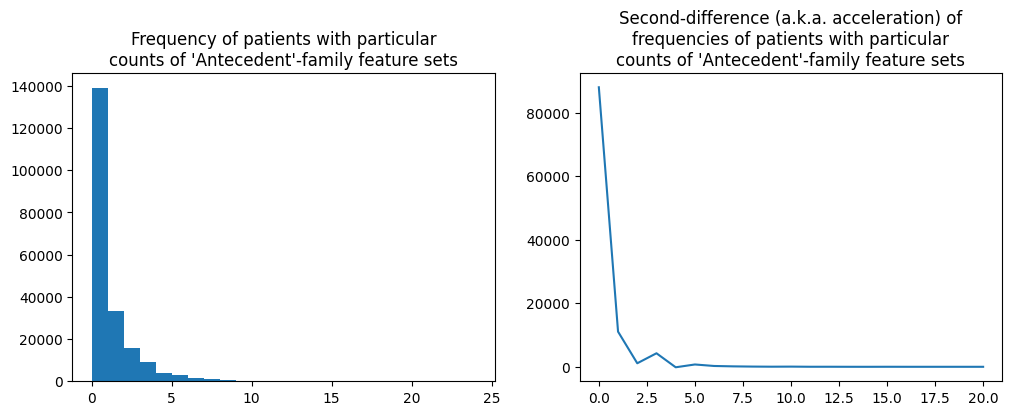

In [6]:
countvar = array_any_antecedent_atLeast.sum(axis = 1)

# Plot parameters.
fig, axs = matplotlib.pyplot.subplots(1, 2, figsize = (12, 4))

# Raw count histogram
axs[0].hist(
    countvar
    ,bins = countvar.max().astype(int)
)
axs[0].set_title('Frequency of patients with particular\ncounts of \'Antecedent\'-family feature sets')

# Line plot of 2nd-differences.
fd = countvar.value_counts().iloc[:-1].astype(int).to_numpy()
fd_lag = countvar.value_counts().iloc[1:].astype(int).to_numpy()
sd = (fd - fd_lag)[:-1]
sd_lag = (fd - fd_lag)[1:]
axs[1].plot(sd - sd_lag)
axs[1].set_title('Second-difference (a.k.a. acceleration) of\nfrequencies of patients with particular\ncounts of \'Antecedent\'-family feature sets')

# Show plot.
matplotlib.pyplot.show()

Given the plots above:
- I choose the first boundary to be between 0 and 1, based on the histogram of raw counts. This means the definition for 'Few' is {if 0 then True else False}.
- I choose the first boundary to be between 6 and 7, based on the line plot of second-differences settling at 5 (which is 6 because python indexs at 0). This means the definition for 'Some' is {if >0 and <7 then True else False} and 'Many' is {if >6 then True else False}.

Below, I create the feature sets.

In [7]:
few_antecedent = countvar == 0
some_antecedent = countvar.between(1,6)
many_antecedent = countvar > 6

## Create 'Concurrent' family feature sets.


### Create the 'Any' 'Concurrent' family feature set.

In [10]:
# Define list of feature sets that are members of the 'Concurrent' family.
# ## The list of boolean members.
ls_concurrent_fs_bool = \
[
    'abandonment', 'abandonment_Adult', 'AdulthoodConcerns', 'adultVictimOfAbuse',
    'agorophobia', 'agorophobia_Adult', 'alcoholMisuse', 'alcoholMisuse_Adult',
    'anxietyOrPanic', 'anxietyOrPanic_Adult', 'attemptedSuicide', 'attemptedSuicide_Adult',
    'auditoryHallucinations', 'auditoryHallucinations_Adult',
    
    'bodyDysmorphicDisorder', 'bodyDysmorphicDisorder_Adult',
    
    'depressionNotDysthymiaOrChronic', 'depressionNotDysthymiaOrChronic_Adult',
    'dissociation', 'dissociation_Adult', 'drugMisuse', 'drugMisuse_Adult',
    
    'eatingDisorders', 'eatingDisorders_Adult', 'extremeSelfNeglect',
    
    'foodInsecurity', 'foodInsecurity_Adult', 'foodInsecurity_CYP', 'foodInsecurity_EA',
    
    'historyOfOrCurrentAddiction', 'hoarder', 'hoarder_Adult', 'homeless', 'homeless_Adult',
    
    'incarcerationImprisonment', 'incarcerationImprisonment_Adult',
    
    'metabolicSyndrome', 'metabolicSyndrome_Adult',
    
    'nonNativeEnglishSpeaker',
    
    'OCD', 'OCD_Adult',
    
    'paranoia', 'paranoia_Adult', 'poorBodyImage', 'poorBodyImage_Adult', 'poverty',
    'poverty_Adult',
    
    'RecurringMentalSymptoms',
    
    'selfHarm', 'selfHarm_Adult', 'sleepDisturbance', 'sleepDisturbance_Adult',
    'sleepDysfunction', 'sleepDysfunction_Adult', 'substanceMisuse', 'substanceMisuse_Adult',
    'suicidal', 'suicidal_Adult',
    
    'tinnitus', 'tinnitus_Adult',
    
    'UPSI', 'UPSI_Adult',
    
    'violentBehaviour', 'violentBehaviour_Adult'
]
# ## The list of count members.
ls_concurrent_fs_count = \
[
    'countPsychologicalDisorders'
]
# ## The list of ordinal members.
# None.
# ## The list of continuous members.
# None.

# Create a pandas.DataFrame.Series that indicates the patient has at least one 'Concurrent' feature set.
array_any_concurrent_atLeast =\
    pandas.concat(
                    [
                        feature_set_array[feature_set_array.columns.intersection(ls_concurrent_fs_count)] != 0,
                        feature_set_array[feature_set_array.columns.intersection(ls_concurrent_fs_bool)]
                    ],
                    axis = 1,
                )
any_concurrent_atLeast = array_any_concurrent_atLeast.any(True)

### Create the {'Few', 'Some', 'Many'} 'Concurrent' family feature sets.

I plot a histogram of patients' counts of 'Antecedent' feature sets. Hopefully, the boundaries between 'Few'-'Some' and 'Some'-'Many' will be obvious. In case they are not, and assuming the histogram density is a monotonically-decreasing function, I also plot the 2nd-difference (a.k.a. acceleration) plot and look for the point where the line settles. If the histogram density is not a monotonically-decreasing function, then I will justify a bespoke rule.

I expect that the first boundary will be between 0 and 1. I have no expectation for the second boundary.

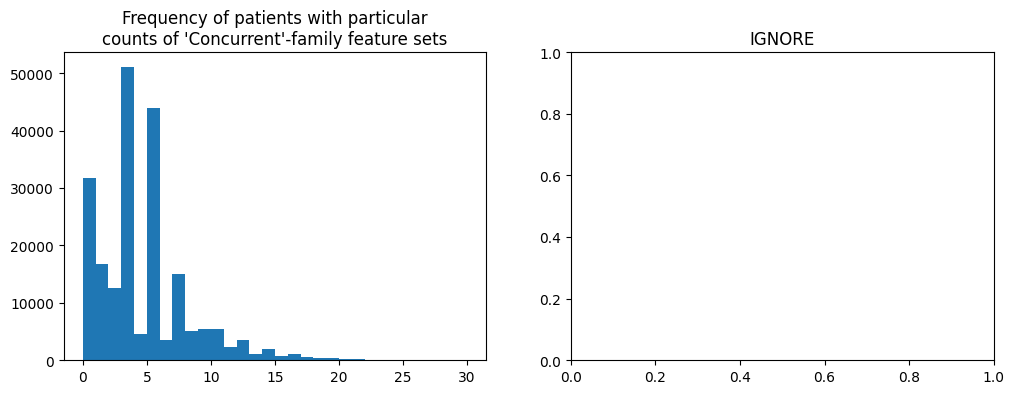

In [68]:
countvar = array_any_concurrent_atLeast.sum(axis = 1)

# Plot parameters.
fig, axs = matplotlib.pyplot.subplots(1, 2, figsize = (12, 4))

# Raw count histogram
axs[0].hist(
    countvar
    ,bins = countvar.max().astype(int)
)
axs[0].set_title('Frequency of patients with particular\ncounts of \'Concurrent\'-family feature sets')

# Line plot of 2nd-differences.
axs[1].set_title('IGNORE')
# Not used because the histogram does not display a monotonically-decreasing density.

# Show plot.
matplotlib.pyplot.show()

Given the plots above:
- I choose the first boundary to be between ???
- I choose the first boundary to be between ???

Below, I create the feature sets.

In [47]:
#few_concurrent = countvar == 0
#some_concurrent = countvar.between(1,6)
#many_concurrent = countvar > 6

## Create 'Service Use' family feature sets.

### Create the 'Any' 'Service Use' family feature set.

In [84]:
# Define list of feature sets that are members of the 'Service Use' family.
# ## The list of boolean members.
ls_serviceUse_fs_bool = \
[
    'AccessToHealthcare', 'AccessToHealthcare_Adult', 'AccessToHealthcare_CYP',
    'AccessToHealthcare_EA',

    'IAPTreferral', 'IAPTreferral_Adult', 'IAPTreferral_CYP', 'IAPTreferral_EA',
    'IAPTrevolvingDoor', 'IAPTrevolvingDoor_Adult', 'IAPTrevolvingDoor_CYP',
    'IAPTrevolvingDoor_EA', 'IAPTuse', 'IAPTuse_Adult', 'IAPTuse_CYP', 'IAPTuse_EA',
    
    'manyDNA', 'manyDNA_Adult', 'manyDNA_CYP', 'manyDNA_EA',
    
    'ratioDNAtoAppointmentPreviousYear'
]
# ## The list of count members.
# None
# ## The list of ordinal members.
ls_serviceUse_fs_ordinal = \
[
    'recurrentEDattednances'
]
# ## The list of continuous members.
ls_serviceUse_fs_continuous = \
[
    'ageAtFirstAdmissionToPsychRehabServices'
]

# Create a pandas.DataFrame.Series that indicates the patient has at least one 'Service Use' feature set.
array_any_serviceUse_atLeast =\
    pandas.concat(
                    [
                        feature_set_array[feature_set_array.columns.intersection(ls_serviceUse_fs_bool)],
                        feature_set_array[feature_set_array.columns.intersection(ls_serviceUse_fs_ordinal)] != 'Infrequent',
                    ],
                    axis = 1,
                )
any_serviceUse_atLeast = array_any_serviceUse_atLeast.any(True)

### Create the {'Few', 'Some', 'Many'} 'Service Use' family feature sets.

I plot a histogram of patients' counts of 'Service Use' feature sets. Hopefully, the boundaries between 'Few'-'Some' and 'Some'-'Many' will be obvious. In case they are not, and assuming the histogram density is a monotonically-decreasing function, I also plot the 2nd-difference (a.k.a. acceleration) plot and look for the point where the line settles. If the histogram density is not a monotonically-decreasing function, then I will justify a bespoke rule.

I expect that the first boundary will be between 0 and 1. I have no expectation for the second boundary.

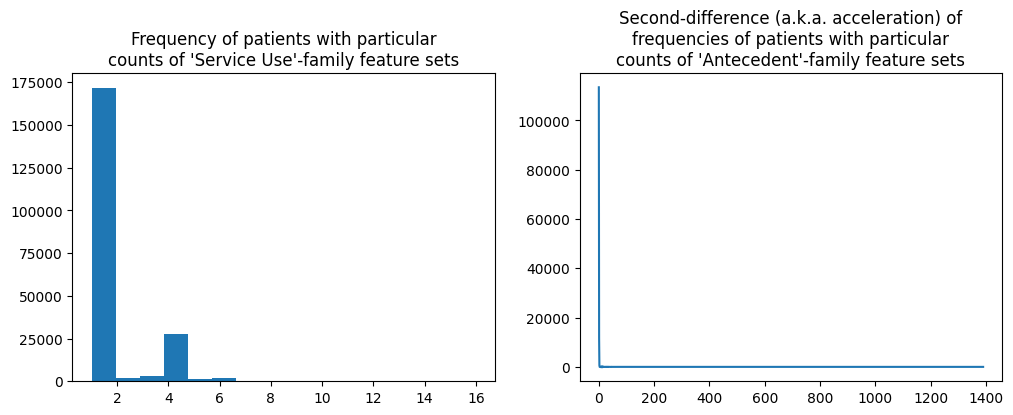

In [52]:
countvar = array_any_serviceUse_atLeast.sum(axis = 1)

# Plot parameters.
fig, axs = matplotlib.pyplot.subplots(1, 2, figsize = (12, 4))

# Raw count histogram
axs[0].hist(
    countvar
    ,bins = countvar.max().astype(int)
)
axs[0].set_title('Frequency of patients with particular\ncounts of \'Service Use\'-family feature sets')

# Line plot of 2nd-differences.
# Not used because the histogram does not display a monotonically-decreasing density.
axs[1].set_title('IGNORE')

# Show plot.
matplotlib.pyplot.show()

Given the plots above:
- I choose the first boundary to be between ???
- I choose the first boundary to be between ???

Below, I create the feature sets.

In [47]:
#few_serviceUse = countvar == 0
#some_serviceUse = countvar.between(1,6)
#many_serviceUse = countvar > 6

## Create 'Treatment' family feature sets.

### Create 'Any' 'Treatment' family feature set.

In [54]:
# Define list of feature sets that are members of the 'Treatment' family.
# ## The list of bool members.
ls_treatment_fs_boolean = \
[
    'MentalHealthTreatments', 'MentalHealthTreatments_Adult', 'MentalHealthTreatments_CYP', 'MentalHealthTreatments_EA'
]
# ## The list of count members.
# None
# ## The list of ordinal members.
# None.
# ## The list of continuous members.
# None.

# Create a pandas.DataFrame.Series that indicates the patient has at least one 'Treatment' feature set.
array_any_treatment_atLeast =\
    pandas.concat(
                    [
                        feature_set_array[feature_set_array.columns.intersection(ls_treatment_fs_bool)]
                    ],
                    axis = 1,
                )
any_treatment_atLeast = array_any_treatment_atLeast.any(True)

### Create the {'Few', 'Some', 'Many'} 'Treatment' family feature sets.

I plot a histogram of patients' counts of 'Treatment' feature sets. Hopefully, the boundaries between 'Few'-'Some' and 'Some'-'Many' will be obvious. In case they are not, and assuming the histogram density is a monotonically-decreasing function, I also plot the 2nd-difference (a.k.a. acceleration) plot and look for the point where the line settles. If the histogram density is not a monotonically-decreasing function, then I will justify a bespoke rule. 

I expect that the first boundary will be between 0 and 1. I have no expectation for the second boundary.

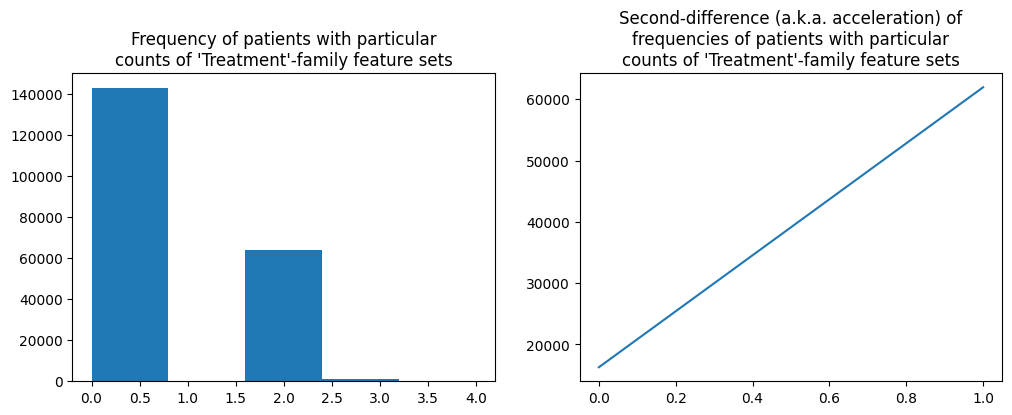

In [58]:
countvar = array_any_treatment_atLeast.sum(axis = 1)

# Plot parameters.
fig, axs = matplotlib.pyplot.subplots(1, 2, figsize = (12, 4))

# Raw count histogram
axs[0].hist(
    countvar
    ,bins = 5#countvar.max().astype(int)
)
axs[0].set_title('Frequency of patients with particular\ncounts of \'Treatment\'-family feature sets')

# Line plot of 2nd-differences.
fd = countvar.value_counts().iloc[:-1].astype(int).to_numpy()
fd_lag = countvar.value_counts().iloc[1:].astype(int).to_numpy()
sd = (fd - fd_lag)[:-1]
sd_lag = (fd - fd_lag)[1:]
axs[1].plot(sd - sd_lag)
axs[1].set_title('Second-difference (a.k.a. acceleration) of\nfrequencies of patients with particular\ncounts of \'Treatment\'-family feature sets')

# Show plot.
matplotlib.pyplot.show()

Given the plots above (noting that the second-difference plot isn't insightful):
- I choose the first boundary to be between 0 and 1, based on the raw counts. This means the definition for 'Few' is {if 0 then True else False}.
- I choose the first boundary to be less than 3, based on the raw counts. This means the definition for 'Some' is {if <3 then True else False} and 'Many' is {if >2 then True else False}.

Below, I create the feature sets.

In [59]:
few_treatment = countvar == 0
some_treatment = countvar < 3
many_treatment = countvar > 2

## Create 'Chaotic' family feature sets.

### Create the 'Any' 'Chaotic' family feature set.

In [20]:
# Define list of feature sets that are members of the 'Chaotic' family.
# ## The list of boolean members.
# None
# ## The list of count members.
ls_chatoic_fs_count = \
[
    'countAppointmentsPreviousYear', 'countDNAsPreviousYear', 'medianAnnualCountAppointments',
    'medianAnnualCountAppointments_Adult', 'medianAnnualCountAppointments_CYP',
    'medianAnnualCountAppointments_EA', 'medianAnnualCountDNAs', 'medianAnnualCountDNAs_Adult',
    'medianAnnualCountDNAs_CYP', 'medianAnnualCountDNAs_EA'
]
# ## The list of ordinal members.
# None.
# ## The list of continuous members.
ls_chatoic_fs_continuous = \
[
    'activeInformationAppointments', 'activeInformationDNAs', 'activeInformationMHcrises',
    
    'bubbleEntropyAppointments', 'bubbleEntropyDNAs', 'bubbleEntropyMHcrises',
    
    'entropyRateAppointments', 'entropyRateDNAs', 'entropyRateMHcrises',
    'eoeAppointments', 'eoeDNAs', 'eoeMHcrises',
    
    'medianAnnualRatioDNAtoAppointment', 'medianAnnualRatioDNAtoAppointment_Adult',
    'medianAnnualRatioDNAtoAppointment_CYP', 'medianAnnualRatioDNAtoAppointment_EA',
    
    'sampleEntropyAppointments', 'sampleEntropyDNAs', 'sampleEntropyMHcrises',
    'spectralEntropyAppointments', 'spectralEntropyDNAs', 'spectralEntropyMHcrises'
]

# Create a pandas.DataFrame.Series that indicates the patient has at least one 'Concurrent' feature set.
array_any_chaotic_atLeast =\
    pandas.concat(
                    [
                        feature_set_array[feature_set_array.columns.intersection(ls_chaotic_fs_count)] != 0,
                        feature_set_array[feature_set_array.columns.intersection(ls_chaotic_fs_continuous)]
                    ],
                    axis = 1,
                )
any_chaotic_atLeast = array_any_chaotic_atLeast.any(True)

### Create the {'Few', 'Some', 'Many'} 'Chaotic' family feature sets.

I plot a histogram of patients' counts of 'Chaotic' feature sets. Hopefully, the boundaries between 'Few'-'Some' and 'Some'-'Many' will be obvious. In case they are not, and assuming the histogram density is a monotonically-decreasing function, I also plot the 2nd-difference (a.k.a. acceleration) plot and look for the point where the line settles. If the histogram density is not a monotonically-decreasing function, then I will justify a bespoke rule. 

I expect that the first boundary will be between 0 and 1. I have no expectation for the second boundary.

Given the plots above:
- I choose the first boundary to be ???
- I choose the first boundary to be ???

Below, I create the feature sets.

In [7]:
#few_chaotic = countvar == 0
#some_chaotic = countvar.between(1,6)
#many_chaotic = countvar > 6

## Create 'Patterns of Prescription' family feature sets.

### Create the 'Any' 'Patterns of Prescription' family feature set.

In [61]:
# Define list of feature sets that are members of the 'Patterns of Prescription' family.
# ## The list of boolean members.
ls_patternsOfPrescription_fs_bool = \
[
    'antipsychoticsPrescription'   
]
# ## The list of count members.
ls_patternsOfPrescription_fs_count = \
[
    'countAbortedAntidepressantMedicationRegimes', 'countAntidepressantPrescriptions',
    'countHypnoticsAndAnxiolyticsPrescriptions', 'countUniqueAntidepressants',
    'countUniqueHypnoticsAndAnxiolytics'
]
# ## The list of ordinal members.
# None
# ## The list of continuous members.
# None

# Create feature set that indicates the patient has at least one 'Patterns of Prescription' feature set.
array_any_patternsOfPrescription_atLeast =\
    pandas.concat(
                    [
                        feature_set_array[feature_set_array.columns.intersection(ls_patternsOfPrescription_fs_count)] != 0,
                        feature_set_array[feature_set_array.columns.intersection(ls_patternsOfPrescription_fs_bool)]
                    ],
                    axis = 1,
                )
any_patternsOfPrescription_atLeast = array_any_patternsOfPrescription_atLeast.any(True)

### Create the {'Few', 'Some', 'Many'} 'Patterns of Prescriptions' family feature sets.

I plot a histogram of patients' counts of 'Patterns of Prescriptions' feature sets. Hopefully, the boundaries between 'Few'-'Some' and 'Some'-'Many' will be obvious. In case they are not, and assuming the histogram density is a monotonically-decreasing function, I also plot the 2nd-difference (a.k.a. acceleration) plot and look for the point where the line settles. If the histogram density is not a monotonically-decreasing function, then I will justify a bespoke rule. 

I expect that the first boundary will be between 0 and 1. I have no expectation for the second boundary.

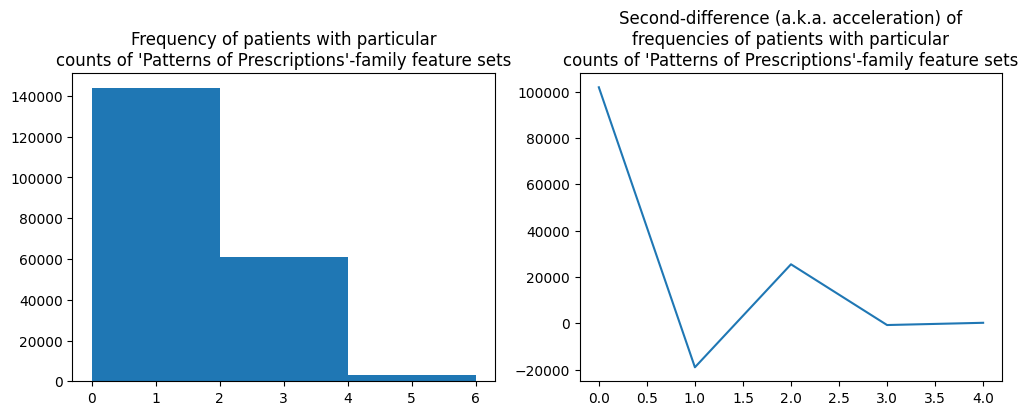

In [73]:
countvar = array_any_patternsOfPrescription_atLeast.sum(axis = 1)

# Plot parameters.
fig, axs = matplotlib.pyplot.subplots(1, 2, figsize = (12, 4))

# Raw count histogram
axs[0].hist(
    countvar
    ,bins = (countvar.max() / 2).astype(int)
)
axs[0].set_title('Frequency of patients with particular\ncounts of \'Patterns of Prescriptions\'-family feature sets')

# Line plot of 2nd-differences.
fd = countvar.value_counts().iloc[:-1].astype(int).to_numpy()
fd_lag = countvar.value_counts().iloc[1:].astype(int).to_numpy()
sd = (fd - fd_lag)[:-1]
sd_lag = (fd - fd_lag)[1:]
axs[1].plot(sd - sd_lag)
axs[1].set_title('Second-difference (a.k.a. acceleration) of\nfrequencies of patients with particular\ncounts of \'Patterns of Prescriptions\'-family feature sets')

# Show plot.
matplotlib.pyplot.show()

Given the plots above (noting that the second-difference plot isn't insightful):
- I choose the first boundary to be between 0 and 2, based on the raw counts and the histogram. This means the definition for 'Few' is {if <2 then True else False}.
- I choose the first boundary to be between 2 and 4, inclusive, based on the the histogram. This means the definition for 'Some' is {if >2 and <4 then True else False} and 'Many' is {if >4 then True else False}.

Below, I create the feature sets.

In [77]:
few_patternsOfPrescriptions = countvar <2
some_patternsOfPrescriptions = countvar.between(2,4)
many_patternsOfPrescriptions = countvar > 4

## Create 'Relevant Prescriptions' family feature sets.

### Create 'Any' 'Relevant Prescriptions' family feature set.

In [60]:
# Define list of feature sets that are members of the 'Relevant Prescriptions' family.
# ## The list of boolean members.
ls_relevantPrescriptions_fs_bool = \
[
    'relevantPrescriptions', 'relevantPrescriptions_Adult', 'relevantPrescriptions_CYP',
    'relevantPrescriptions_EA'
]
# ## The list of count members.
# None
# ## The list of ordinal members.
# None
# ## The list of continuous members.
# None

# Create feature set that indicates the patient has at least one 'Relevant Prescriptions' feature set.
array_any_relevantPrescriptions_atLeast =\
    pandas.concat(
                    [
                        feature_set_array[feature_set_array.columns.intersection(ls_relevantPrescriptions_fs_bool)]
                    ],
                    axis = 1,
                )
any_relevantPrescriptions_atLeast = array_any_relevantPrescriptions_atLeast.any(True)

### Create the {'Few', 'Some', 'Many'} 'Relevant Prescriptions' family feature sets.

I plot a histogram of patients' counts of 'Relevant Prescriptions' feature sets. Hopefully, the boundaries between 'Few'-'Some' and 'Some'-'Many' will be obvious. In case they are not, and assuming the histogram density is a monotonically-decreasing function, I also plot the 2nd-difference (a.k.a. acceleration) plot and look for the point where the line settles. If the histogram density is not a monotonically-decreasing function, then I will justify a bespoke rule. 

I expect that the first boundary will be between 0 and 1. I have no expectation for the second boundary.

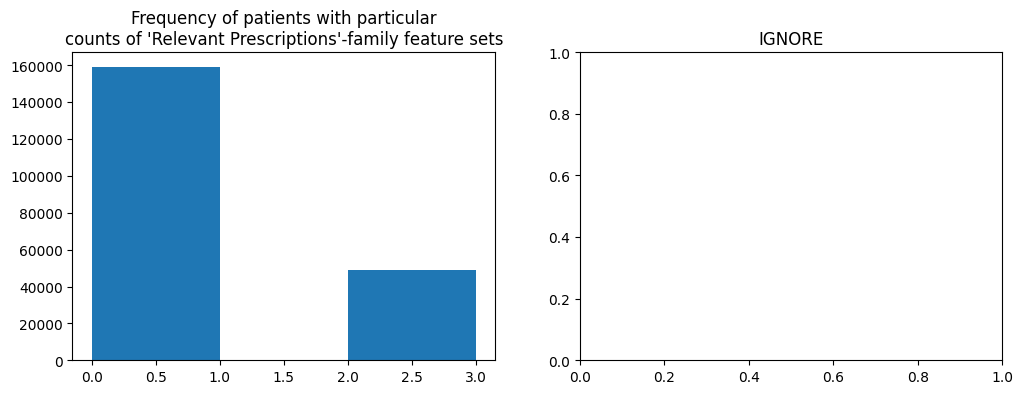

In [70]:
countvar = array_any_relevantPrescriptions_atLeast.sum(axis = 1)

# Plot parameters.
fig, axs = matplotlib.pyplot.subplots(1, 2, figsize = (12, 4))

# Raw count histogram
axs[0].hist(
    countvar
    ,bins = countvar.max().astype(int)
)
axs[0].set_title('Frequency of patients with particular\ncounts of \'Relevant Prescriptions\'-family feature sets')

# Line plot of 2nd-differences.
axs[1].set_title('IGNORE')
# Not used because there are too few unique values.

# Show plot.
matplotlib.pyplot.show()

Given the plots above (noting that the second-difference plot isn't insightful):
- I choose the first boundary to be between 0 and 1, based on the raw counts. This means the definition for 'Few' is {if 0 then True else False}.
- I choose the secondary boundary to be between 1 and 2, inclusive, based on the raw counts. This means the definition for 'Some' is {if >0 and <3 then True else False} and 'Many' is {if >2 then True else False}.

Below, I create the feature sets.

In [71]:
few_relevantPrescriptions = countvar == 0
some_relevantPrescriptions = countvar.between(1,2)
many_relevantPrescriptions= countvar > 2

## Store of feature_set_array.

In [135]:
%store feature_set_array

Stored 'feature_set_array' (DataFrame)


In [96]:
ls = []
for i in feature_set_array.columns[1:]:
    ls.append([i, feature_set_array[i].unique()])
pandas.set_option('display.max_rows', 300) 
pandas.DataFrame(ls)

,0,1
0,abandonment,"[False, True]"
1,abandonment_CYP,[False]
2,abandonment_EA,[False]
3,abandonment_Adult,"[False, True]"
4,ADHD,"[False, True]"
5,ADHD_CYP,"[False, True]"
6,ADHD_EA,"[False, True]"
7,ADHD_Adult,"[False, True]"
8,adultVictimOfAbuse,"[False, True]"
9,ageAtFirstAdmissionToPsychRehabServices,"[False, True]"
